# **This is a data analysis and visualization notebook made with Python on AI-Data Salary dataset collected from ai-jobs.net. The dataset link: [https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024]**

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-data-science-job-salaries-2024/DataScience_salaries_2024.csv


In [2]:
data = pd.read_csv("/kaggle/input/latest-data-science-job-salaries-2024/DataScience_salaries_2024.csv")

# Display the first few rows and summary information about the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


(   work_year experience_level employment_type                       job_title  \
 0       2021               MI              FT                  Data Scientist   
 1       2021               MI              FT                 BI Data Analyst   
 2       2020               MI              FT                  Data Scientist   
 3       2021               MI              FT                     ML Engineer   
 4       2022               SE              FT  Lead Machine Learning Engineer   
 
      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
 0  30400000             CLP          40038                 CL           100   
 1  11000000             HUF          36259                 HU            50   
 2  11000000             HUF          35735                 HU            50   
 3   8500000             JPY          77364                 JP            50   
 4   7500000             INR          95386                 IN            50   
 
   company_location comp

In [8]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
data.work_year.value_counts()

work_year
2023    8519
2024    4374
2022    1652
2021     218
2020      75
Name: count, dtype: int64

**There's considerably low data points for the years of 2020 and 2021, however we're only looking at Average salary for now**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


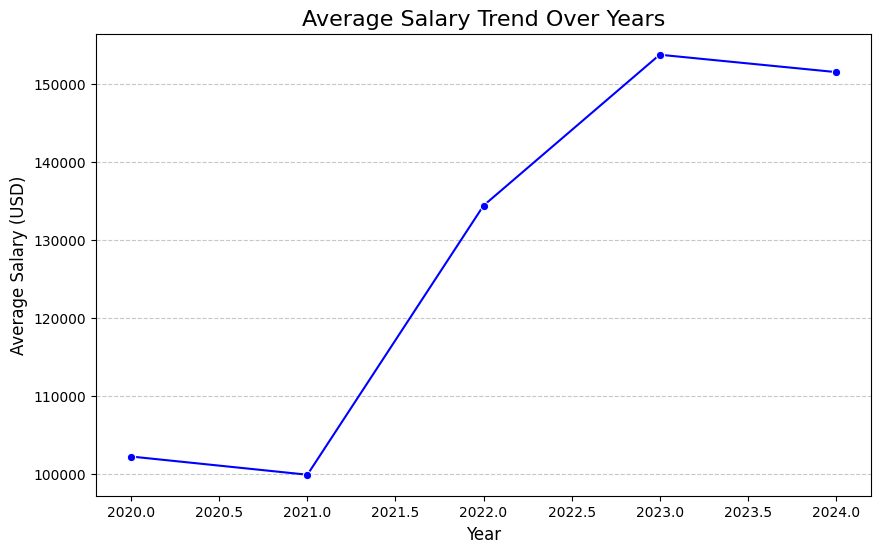

In [32]:
# Average salary trend over work years
yearly_salary_trend = data.groupby('work_year')['salary_in_usd'].mean().round(2)

# Salary comparison by remote ratio
remote_salary = data.groupby('remote_ratio')['salary_in_usd'].mean().round(2)

# Plot salary trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_salary_trend.index, y=yearly_salary_trend.values, marker='o', color='blue')
plt.title('Average Salary Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Average Salary was highest in 2023 followed by 2024 for the dataset**

Let's look at data for the current year-2024

In [7]:
data_2024=data.loc[data['work_year']==2024]

In [25]:
salary_stats = data_2024['salary_in_usd'].describe().round(2)
salary_stats

count      4374.00
mean     151510.09
std       77145.84
min       16666.00
25%      100000.00
50%      140000.00
75%      187000.00
max      800000.00
Name: salary_in_usd, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


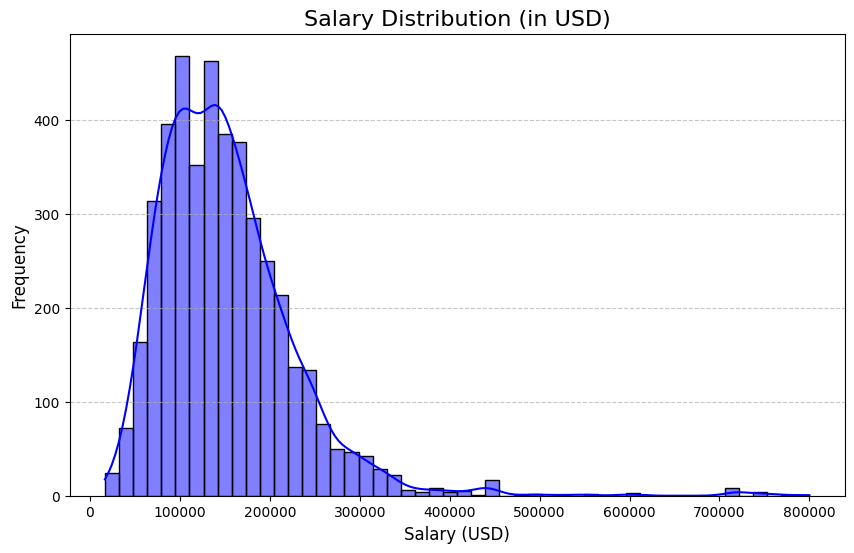

In [10]:

# Plot salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_2024['salary_in_usd'], bins=50, kde=True, color='blue')
plt.title('Salary Distribution (in USD)', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:
# Average salary by experience level
experience_salary = data_2024.groupby('experience_level')['salary_in_usd'].mean().round(2).sort_values(ascending=False)
experience_salary

experience_level
EX    203320.85
SE    168214.91
MI    136547.60
EN     98308.91
Name: salary_in_usd, dtype: float64

In [34]:
# Top-paying job titles
top_job_titles = data_2024.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).round(2).head(10)

# Average salary by company size
company_size_salary = data_2024.groupby('company_size')['salary_in_usd'].mean().round(2).sort_values(ascending=False)

# Display results
top_job_titles


job_title
Head of Machine Learning                    376000.00
Managing Director Data Science              260000.00
AI Architect                                258753.12
Machine Learning Infrastructure Engineer    240000.00
Prompt Engineer                             230010.75
Data Analytics Lead                         226525.00
Data Infrastructure Engineer                225205.00
Data Product Owner                          223260.00
Head of Data                                222750.00
Research Scientist                          214740.64
Name: salary_in_usd, dtype: float64

In [35]:
# Lowest-paying job titles
low_paying_job_titles = data_2024.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending= True).round(2).head(10)

In [36]:
low_paying_job_titles

job_title
Big Data Engineer                         22605.5
AI Programmer                             30000.0
Applied Data Scientist                    30000.0
AI Developer                              33333.0
Lead Data Analyst                         39615.0
CRM Data Analyst                          40000.0
Admin & Data Analyst                      42222.0
Insight Analyst                           45000.0
Quantitative Research Analyst             51000.0
Encounter Data Management Professional    56650.0
Name: salary_in_usd, dtype: float64

In [37]:
company_size_salary

company_size
L    156214.10
M    151489.85
S     78114.38
Name: salary_in_usd, dtype: float64

In [19]:
yearly_salary_trend.round(2)

work_year
2020    102250.87
2021     99922.07
2022    134404.07
2023    153732.66
2024    151510.09
Name: salary_in_usd, dtype: float64

In [38]:
remote_salary.round(2)

remote_ratio
0      153847.45
50      83056.98
100    145109.56
Name: salary_in_usd, dtype: float64

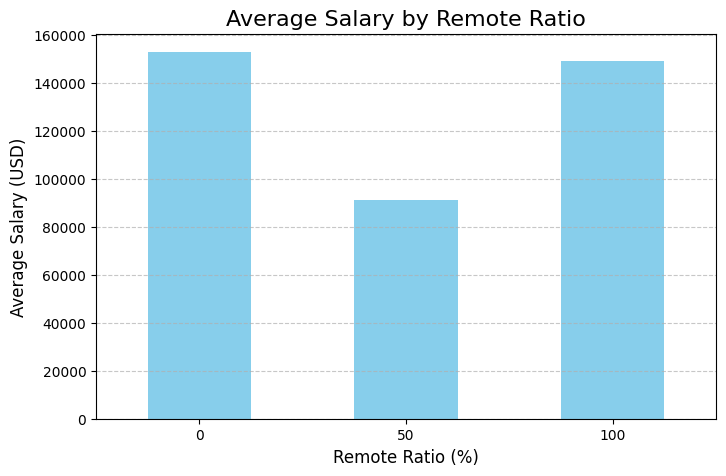

In [44]:
# Remote Work Impact
remote_salary = data_2024.groupby('remote_ratio')['salary_in_usd'].mean().round(2)

# Top-paying countries
top_employee_countries = data_2024.groupby('employee_residence')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(10)

# Salaries by company location
company_location_salary = data_2024.groupby('company_location')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(10)

# Remote work impact
plt.figure(figsize=(8, 5))
remote_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Remote Ratio', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
# Display results
print("\nRemote Work Impact on Average salary:\n", remote_salary)
print("\nTop-Paying Countries:\n", top_employee_countries)
print("\nSalaries by Company Location:\n", company_location_salary)


Remote Work Impact on Average salary:
 remote_ratio
0      152690.43
50      90979.00
100    148939.87
Name: salary_in_usd, dtype: float64

Top-Paying Countries:
 employee_residence
MX    223774.50
CH    196401.00
US    157129.54
EG    150708.33
SA    150000.00
CA    147235.77
NZ    143729.00
PL    135444.25
AU    133389.57
FR    113459.36
Name: salary_in_usd, dtype: float64

Salaries by Company Location:
 company_location
MX    223774.50
CH    196401.00
US    157129.54
EG    150708.33
SA    150000.00
CA    147235.77
NZ    143729.00
PL    135444.25
AU    133389.57
FR    113459.36
Name: salary_in_usd, dtype: float64


In [46]:
# Correlation Analysis
correlation_matrix = data_2024[['remote_ratio', 'salary_in_usd']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                remote_ratio  salary_in_usd
remote_ratio       1.000000      -0.022938
salary_in_usd     -0.022938       1.000000
